## EE 123 Lab 0 - Basic Python and DTFT <br> <small> January 21st, 2016 </small>

### General iPython Notebook usage instructions

- Click the `Play` button to run and advance a cell. The short-cut for it is `shift-enter`
- To add a new cell, either select `"Insert->Insert New Cell Below"` or click the white down arrow button
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text
- You can change the texts in the `Markdown` cells by double-clicking them.
- To save your notebook, either select `"File->Save and Checkpoint"` or hit `Command-s` for Mac and `Ctrl-s` for Windows
- To undo in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows
- To undo `Delete Cell`, select `Edit->Undo Delete Cell`
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

### Basic Python Questions:

To complete this part of the lab, you will need to read and run the python tutorial posted on the class website.

Double-click the answer cell to add your answer. You can also insert a new cell by selecting `"Insert->Insert New Cell Below"` or clicking the white down arrow

__Q0.__ What do you add after a function to get the help window?

__A0.__ Question mark (?)

__Q1.__ What do you have to import to make all division a real division?

__A1.__ You have to import __division__ from ___future____

__Q2.__ What are the standard abbreviations for `numpy` and `matplotlib.pyplot` ?

__A2.__ numpy => np, matplotlib.pyplot => plt

__Q3.__ What is the output of the following commands?

    x = np.array([1,2,3,4,5,6])
    y = x[0:4]
    y[0] = 7
    print x

__A3.__ [7,2,3,4,5,6]

__Q4.__ Write a code that prints `[5 4 3 2 1 0 1 2 3 4]`.

In [7]:
# A4.
import numpy as np
print (np.r_[-10:0] + 5)

[-5 -4 -3 -2 -1  0  1  2  3  4]


__Q5.__ Write a code that prints out an array of every other integer from 0 to 4

In [8]:
# A5.
print np.r_[0:5:2]

[0 2 4]


__Q6.__ Generate the same plot as in the following figure inline:
    



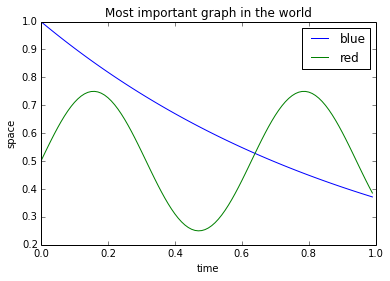

In [9]:
from IPython.display import Image
Image('http://inst.eecs.berkeley.edu/~ee123/sp14/lab/tutorial_plot.jpg')

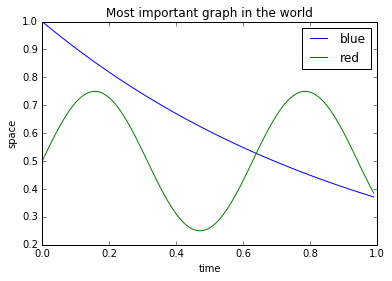

In [11]:
# A6.
import matplotlib.pyplot as plt
%matplotlib inline

t = np.r_[0:1:0.01]
blue = np.exp(-t)
red = 0.25 * np.sin(t * 10.0) + 0.5
plt.figure()
plt.plot(t, blue, 'blue')
plt.plot(t, red, 'green')
plt.xlabel('time')
plt.ylabel('space')
plt.title('Most important graph in the world')
plt.legend(('blue', 'red'))




### DTFT:

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

In [10]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

### Solution for (a):

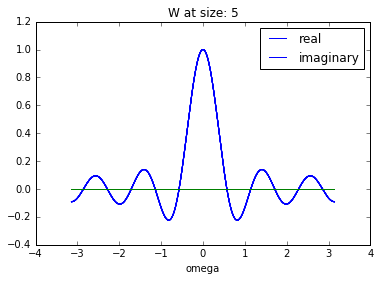

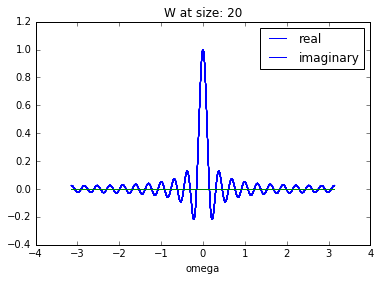

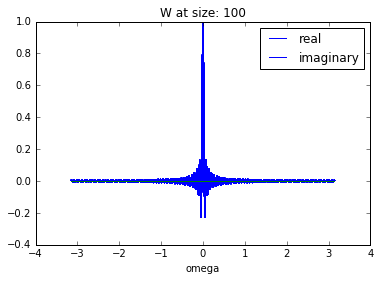

In [55]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        NN = np.r_[-N:N+1]
        
        # create window function (w) using np.ones
        ### FILL IN ###
        w = np.ones(NN.size)
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        Omega = np.linspace(-np.pi, np.pi, 512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        n, omega = np.meshgrid(NN, Omega)
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
        
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        #W = 1/(2*N) * W
        W = W/W[256]
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        plt.figure()
        plt.plot(omega, W.real, 'blue')
        plt.plot(omega, W.imag, 'green')

        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        plt.xlabel('omega')
        plt.title('W at size: %d' % N)
        plt.legend(('real', 'imaginary'))

Describe the effect of increasing $N$ on the DTFT:



----
Increasing $N$ makes the DTFT have more undulations and it also makes more narrower.

### Part (b):

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

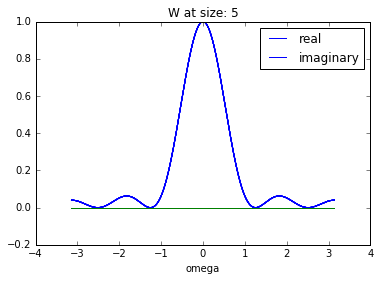

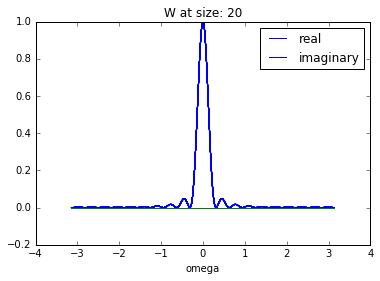

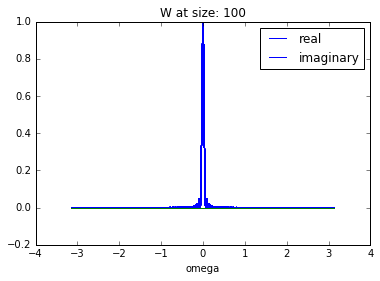

In [54]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        NN = np.r_[-N:N+1]
        # create window function (w) 
        ### FILL IN ###
        w = (1 - np.abs(NN) / N) * np.ones(NN.size)
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        Omega = np.linspace(-np.pi, np.pi, 512)
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        n, omega = np.meshgrid(NN, Omega)
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        #W = 1/N * W
        W = W/W[256]
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        plt.figure()
        plt.plot(omega, W.real, 'blue')
        plt.plot(omega, W.imag, 'green')
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        plt.xlabel('omega')
        plt.title('W at size: %d' % N)
        plt.legend(('real', 'imaginary'))
        

Describe the effect of increasing $N$ on the DTFT:


----
Increasing $N$ makes the DTFT have more undulations and it also makes the peak much sharper.

### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.


### Solution for (c):

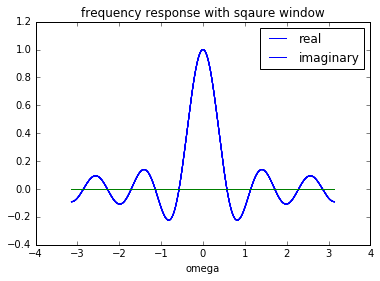

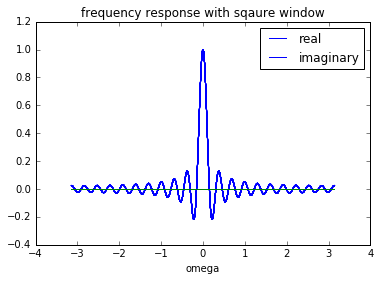

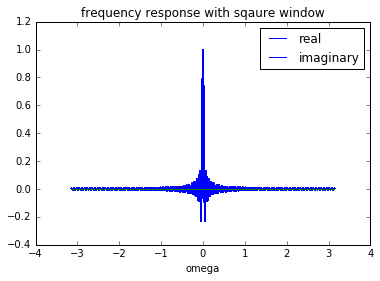

In [56]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        NN = np.r_[-N:N+1]
        # create window function (w)
        ### FILL IN ###
        sinc = np.sin(0.3*np.pi * N)/(np.pi * N)
        w = np.ones(NN.size) * sinc
    
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        Omega = np.linspace(-np.pi, np.pi, 512)
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        n, omega = np.meshgrid(NN, Omega)
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        W = W/W[256]
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        plt.figure()
        plt.plot(omega, W.real, 'blue')
        plt.plot(omega, W.imag, 'green')
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        plt.xlabel('omega')
        plt.title('frequency response with sqaure window')
        plt.legend(('real', 'imaginary'))
        

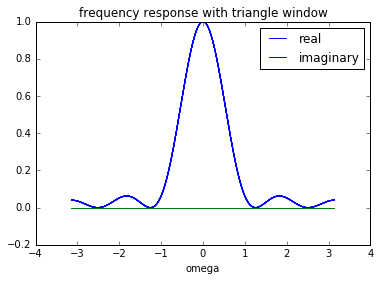

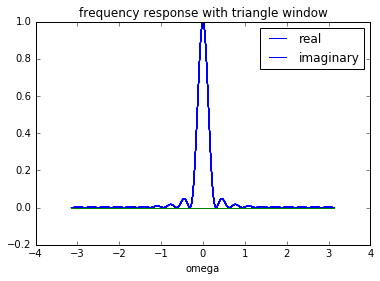

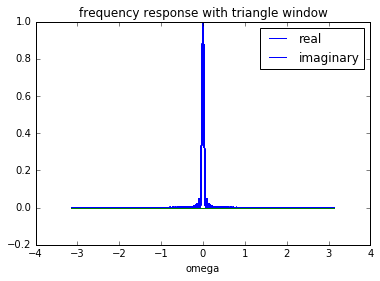

In [57]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        NN = np.r_[-N:N+1]
        # create window function (w)
        ### FILL IN ###
        sinc = np.sin(0.3*np.pi * N)/(np.pi * N)
        w = sinc * (1 - np.abs(NN) / N) * np.ones(NN.size)
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        Omega = np.linspace(-np.pi, np.pi, 512)
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        n, omega = np.meshgrid(NN, Omega)
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        W = W/W[256]
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        plt.figure()
        plt.plot(omega, W.real, 'blue')
        plt.plot(omega, W.imag, 'green')
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        plt.xlabel('omega')
        plt.title('frequency response with triangle window')
        plt.legend(('real', 'imaginary'))
        

Explain the difference:



____
The DTFT of the one that was truncated with the triangle window has all positive values and the one truncated with the square window does not.